<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency # science + python :)
from scipy.stats.contingency import association

%matplotlib inline 
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [10]:
financial_assets_prices = pd.read_csv("/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_4/QUEST/financial_assets_prices.csv")
financial_assets_prices

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,NaN,70.11
779,2021-12-28,249.9368,104.526,39.115000,NaN,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [11]:
financial_assets_prices.shape

(783, 6)

In [12]:
financial_assets_prices.columns

Index(['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], dtype='object')

In [13]:
# Rellenamos los Nans para poder hacer el gráfico
financial_assets_prices["Asset1"] = financial_assets_prices["Asset1"].fillna(method="ffill")
financial_assets_prices["Asset2"] = financial_assets_prices["Asset2"].fillna(method="ffill")
financial_assets_prices["Asset3"] = financial_assets_prices["Asset3"].fillna(method="ffill")
financial_assets_prices["Asset4"] = financial_assets_prices["Asset4"].fillna(method="ffill")
financial_assets_prices["Asset5"] = financial_assets_prices["Asset5"].fillna(method="ffill")

/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3911813761.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  financial_assets_prices["Asset1"] = financial_assets_prices["Asset1"].fillna(method="ffill")
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3911813761.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  financial_assets_prices["Asset2"] = financial_assets_prices["Asset2"].fillna(method="ffill")
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3911813761.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  financial_assets_prices["Asset3"] = financial_assets_prices["Asset3"].fillna(method="ffill")
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/39118

In [14]:
# Para poder graficar estas 4 columnas, aplicamos pd.melt 
# Así tendremos una sola columna para "y" (price) y una columna Asset que indique a qué activo corresponde cada valor.
financial_assets_long = financial_assets_prices.melt(id_vars='date', 
                                                     value_vars=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'], 
                                                     var_name='Asset', 
                                                     value_name='Price')
financial_assets_long

,date,Asset,Price
0,2019-01-02,Asset1,231.5061
1,2019-01-03,Asset1,231.0356
2,2019-01-04,Asset1,230.4026
3,2019-01-07,Asset1,230.0543
4,2019-01-08,Asset1,229.7012
...,...,...,...
3910,2021-12-27,Asset5,70.1100
3911,2021-12-28,Asset5,70.0300
3912,2021-12-29,Asset5,69.8100
3913,2021-12-30,Asset5,69.9100


/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3435078466.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_long, x='date', y='Price', hue='Asset', ci=None)


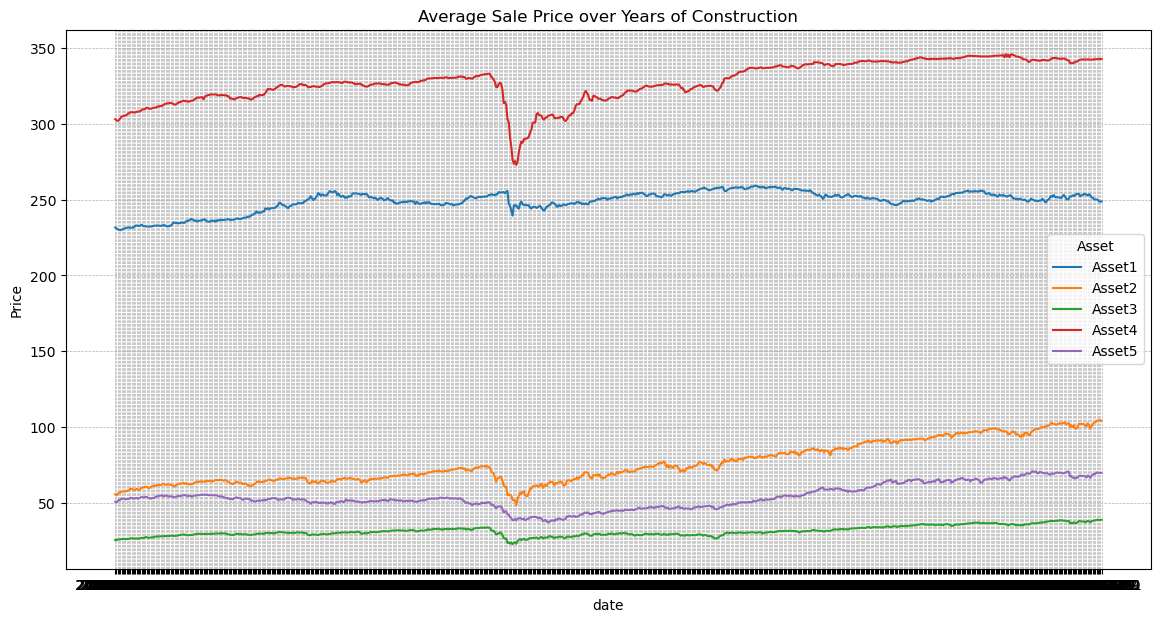

In [15]:
# Ahora podemos graficar los precios respecto al tiempo, en función del nuevo asset
plt.figure(figsize=(14, 7))
sns.lineplot(data=financial_assets_long, x='date', y='Price', hue='Asset', ci=None)
plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/2855404168.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/2855404168.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/2855404168.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/2855404168.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_price

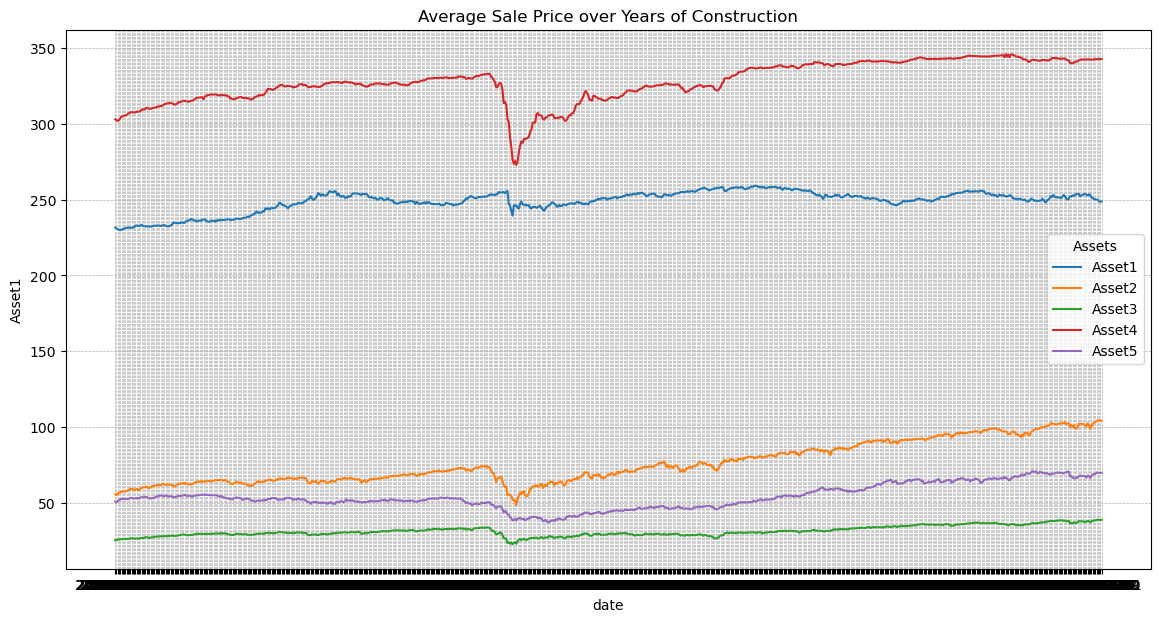

In [16]:
# Podemos hacerlo también con un bucle, que quizá es más intuitivo
plt.figure(figsize=(14, 7))
for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)

plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Assets')
plt.show()

In [17]:
# Como el eje x, con las fechas, no sale bien, intentamos transformar esta columna en formato de fecha y ver si así nos lo muestra
financial_assets_prices['date'] = pd.to_datetime(financial_assets_prices['date'])
financial_assets_prices

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.40,70.11
779,2021-12-28,249.9368,104.526,39.115000,342.40,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3893775030.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3893775030.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3893775030.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)
/var/folders/_9/mcgr34xj3qx_l06p1gdk4lmc0000gn/T/ipykernel_82150/3893775030.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=financial_assets_price

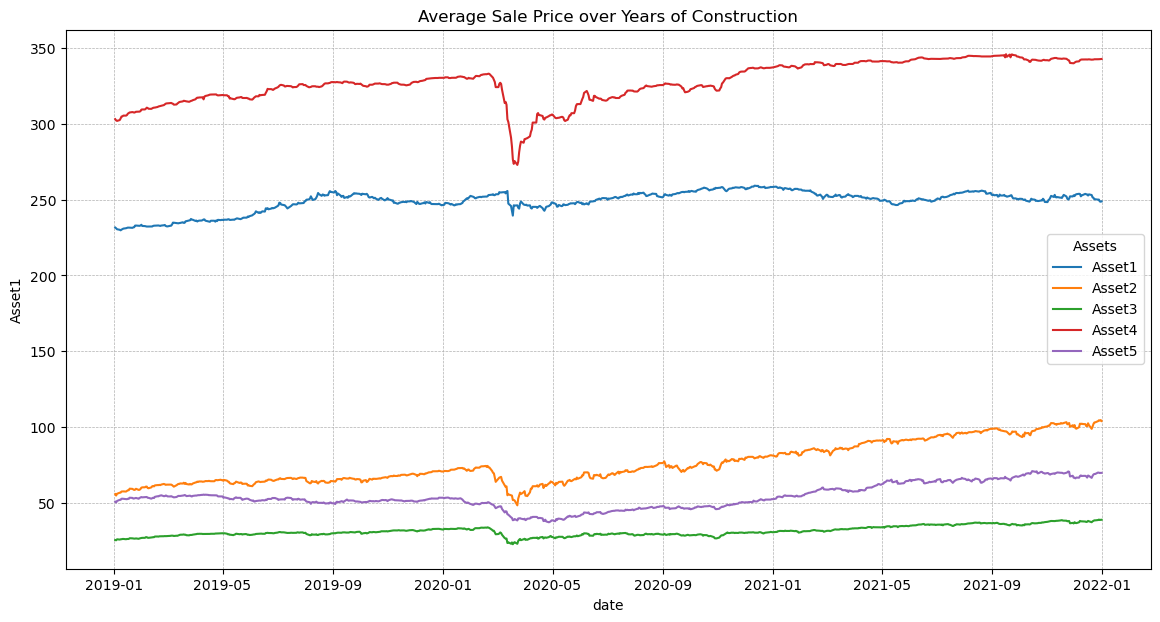

In [18]:
plt.figure(figsize=(14, 7))
for asset in ['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']:
    sns.lineplot(data=financial_assets_prices, x='date', y=asset, label=asset, ci=None)

plt.title('Average Sale Price over Years of Construction')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Assets')
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [21]:
# Rendimientos diarios porcentuales = (Rendimiento de cierre del día actual - rendimiento de cierre del día anterior / rendimiento cierre dia anterior) * 100
# Los rendimientos de cierre del día es el cambio monetario en los precios de la acción (puede ser positivo o negativo)
# Para hacerlo fácil en Python se puede utilizar la función . pct_change()

In [22]:
# Establecemos la columna 'Date' como índice
financial_assets_prices.set_index('date', inplace=True)
financial_assets_prices

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,231.5061,55.875,25.649222,302.93,50.89
2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2019-01-04,230.4026,56.129,26.147133,301.77,51.38
2019-01-07,230.0543,56.838,25.955277,302.33,52.14
2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...
2021-12-27,249.9207,103.956,38.820000,342.40,70.11
2021-12-28,249.9368,104.526,39.115000,342.40,70.03
2021-12-29,248.7215,104.360,38.855000,342.46,69.81


In [23]:
# Calcula los rendimientos diarios
rendimientos_diarios_porcentuales_df = financial_assets_prices[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].pct_change()

# Opcional: restablece el índice si necesitas que 'Date' sea una columna otra vez
rendimientos_diarios_porcentuales_df.reset_index(inplace=True)
rendimientos_diarios_porcentuales_df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
3,2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
4,2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
...,...,...,...,...,...,...
778,2021-12-27,-0.000913,0.007384,0.005439,0.000000,0.013443
779,2021-12-28,0.000064,0.005483,0.007599,0.000000,-0.001141
780,2021-12-29,-0.004862,-0.001588,-0.006647,0.000175,-0.003142
781,2021-12-30,-0.000696,0.002903,0.003346,0.000263,0.001432


<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

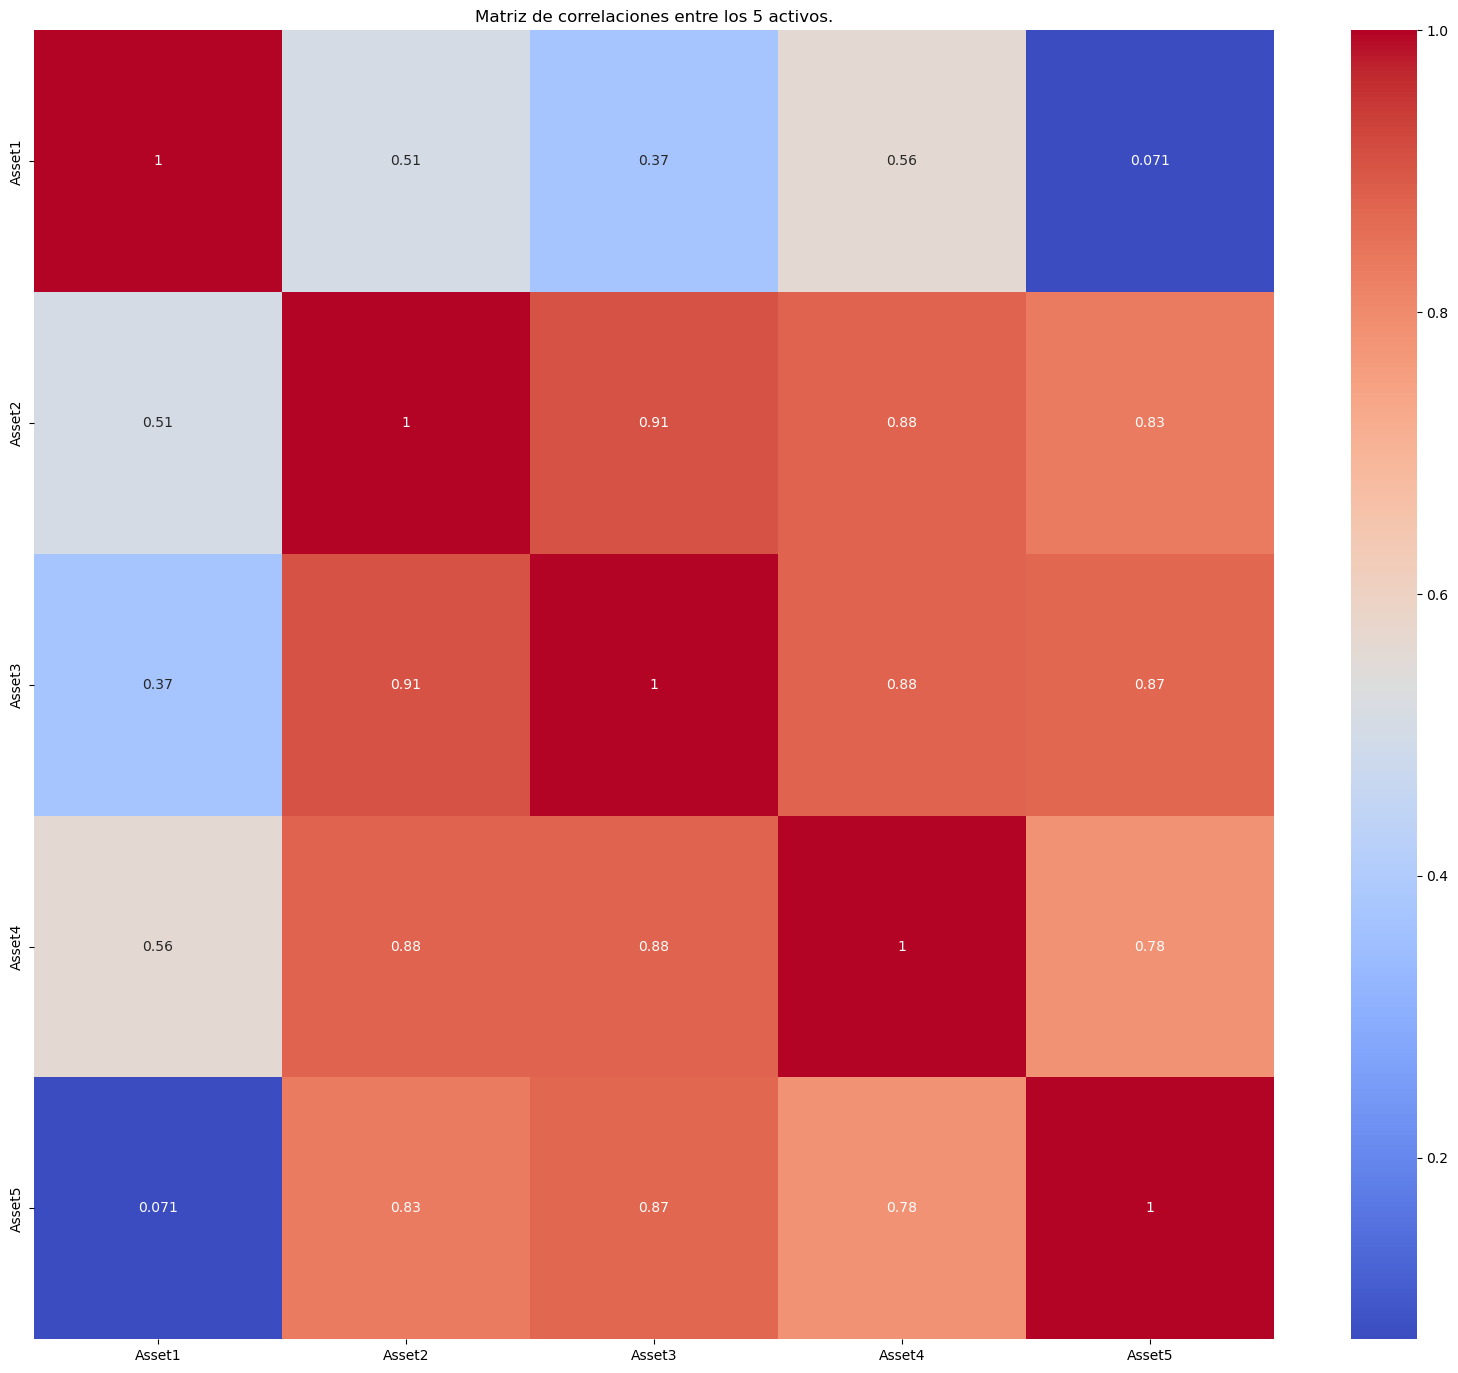

In [25]:
num = financial_assets_prices.select_dtypes(include="number")
correlation_matrix = num.corr()
plt.figure(figsize=(20, 17))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlaciones entre los 5 activos.")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

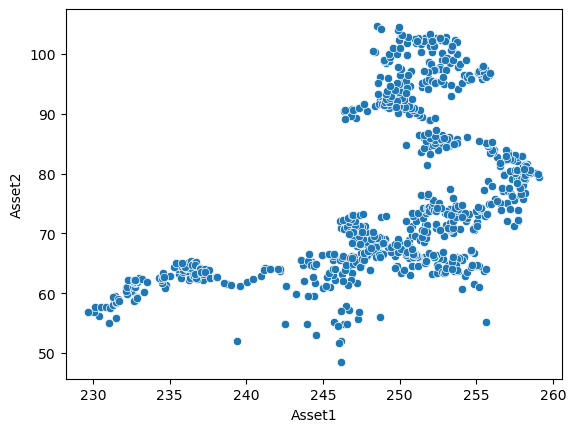

In [27]:
# Lo hacemos con el dataframe de num sin nan para todos los Assets
sns.scatterplot(data=financial_assets_prices, x='Asset1', y='Asset2')
plt.show()

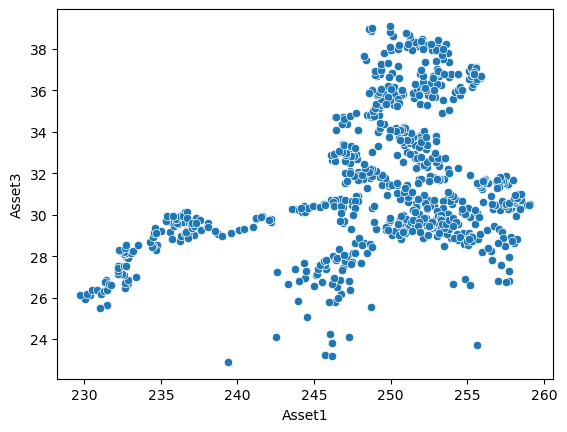

In [28]:
sns.scatterplot(data=financial_assets_prices, x='Asset1', y='Asset3')
plt.show()

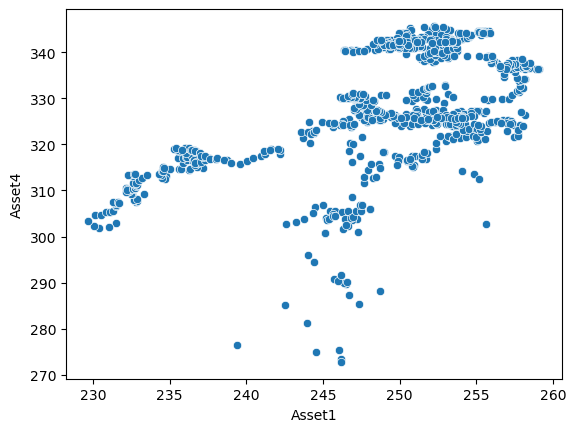

In [29]:
sns.scatterplot(data=financial_assets_prices, x='Asset1', y='Asset4')
plt.show()

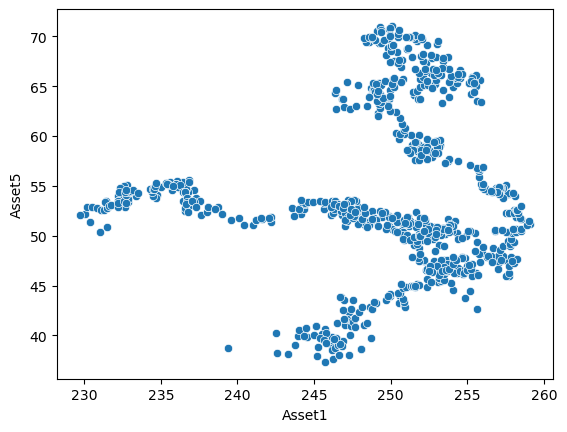

In [30]:
sns.scatterplot(data=financial_assets_prices, x='Asset1', y='Asset5')
plt.show()

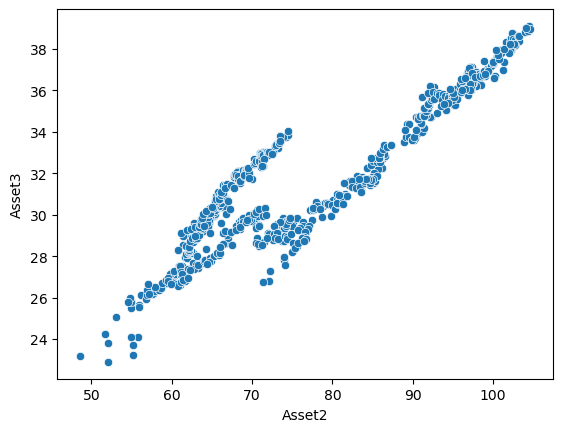

In [31]:
sns.scatterplot(data=financial_assets_prices, x='Asset2', y='Asset3')
plt.show()

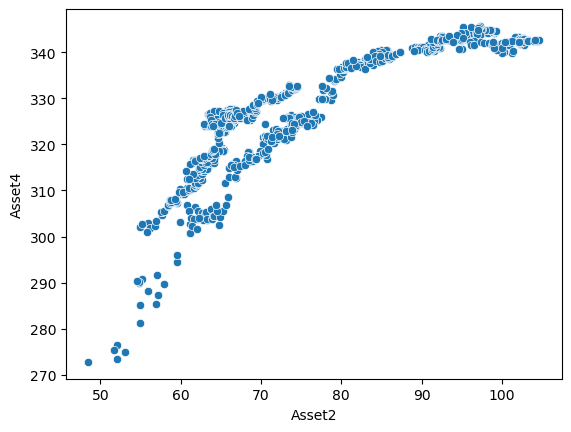

In [32]:
sns.scatterplot(data=financial_assets_prices, x='Asset2', y='Asset4')
plt.show()

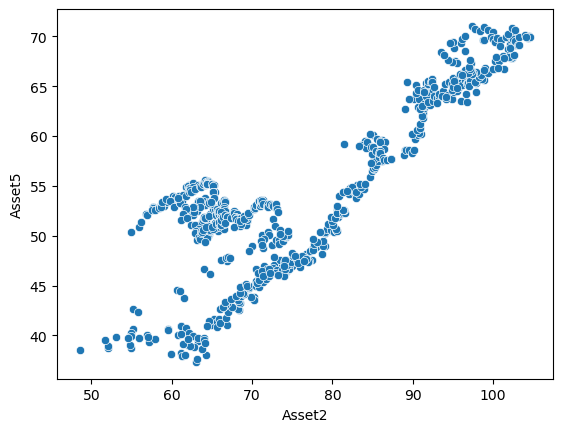

In [33]:
sns.scatterplot(data=financial_assets_prices, x='Asset2', y='Asset5')
plt.show()

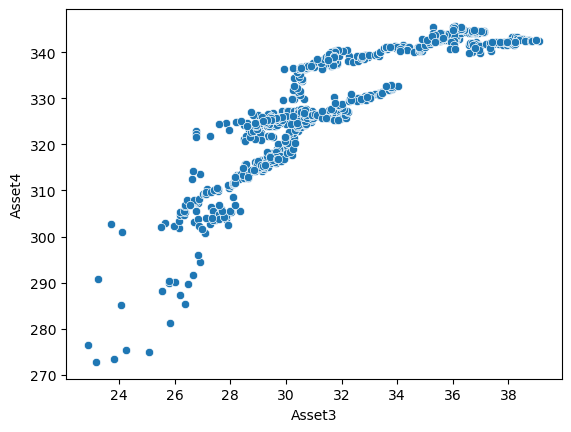

In [34]:
sns.scatterplot(data=financial_assets_prices, x='Asset3', y='Asset4')
plt.show()

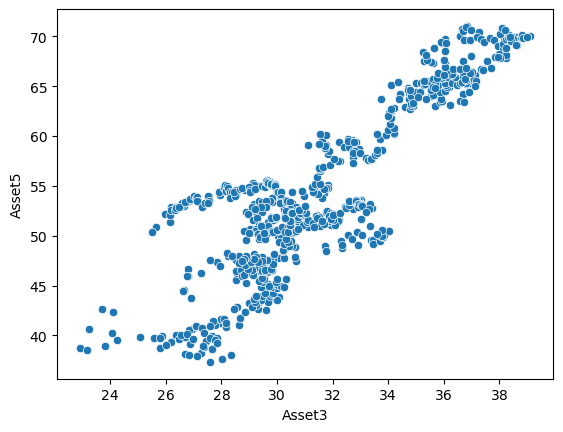

In [35]:
sns.scatterplot(data=financial_assets_prices, x='Asset3', y='Asset5')
plt.show()

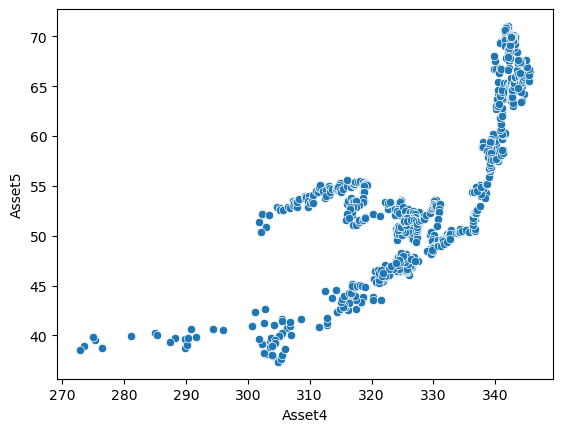

In [36]:
sns.scatterplot(data=financial_assets_prices, x='Asset4', y='Asset5')
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [39]:
portfolio_weigths = pd.read_csv("/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_4/QUEST/portfolio_weights.csv")
portfolio_weigths

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974
...,...,...,...,...,...,...
778,2021-12-27,0.071307,0.266093,0.168775,0.33547,0.158356
779,2021-12-28,0.071307,0.266093,0.168775,0.33547,0.158356
780,2021-12-29,0.071307,0.266093,0.168775,0.33547,0.158356
781,2021-12-30,0.071307,0.266093,0.168775,0.33547,0.158356


In [40]:
portfolio_weigths['date'] = pd.to_datetime(portfolio_weigths['date'])

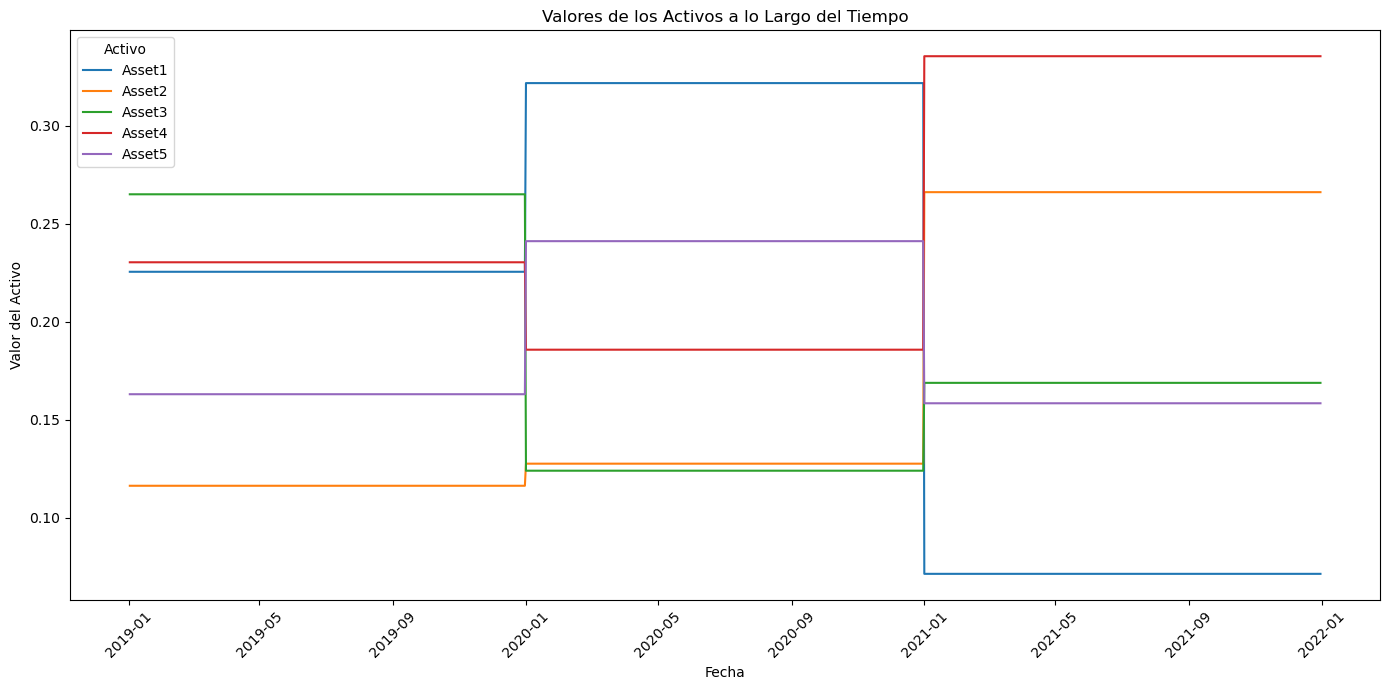

In [41]:
df_vols = portfolio_weigths.melt(id_vars='date', value_vars=['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5'],
                         var_name='Activo', value_name='Valor')
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_vols, x='date', y='Valor', hue='Activo')
# Añadir etiquetas y título
plt.xlabel('Fecha')
plt.ylabel('Valor del Activo')
plt.title('Valores de los Activos a lo Largo del Tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

1. Calcular la rentabilidad de cada día.
2. Calcular la rentabilidad acumulada: Acumula la rentabilidad diaria multiplicativamente para obtener la rentabilidad total hasta cada día.
3. Graficar la rentabilidad acumulada: Finalmente, grafica la rentabilidad acumulada a lo largo del tiempo.

Suma 1 a cada rendimiento diario para obtener los factores de crecimiento diarios: 

- 1 + rendimiento diario

Acumula el producto de estos factores de crecimiento desde el inicio hasta cada día, usando .cumprod() para calcular la rentabilidad acumulada.

Resta 1 al final para que el valor acumulado esté en términos de rentabilidad acumulada y no en términos del índice de crecimiento.

EXPLICACIÓN:

Al tener un CSV con los pesos de cada activo, lo interesante es calcular la rentabilidad histórica acumulada de una cartera de activos.

Los pesos te indican la proporción de cada activo dentro del portafolio y, por lo tanto, son esenciales para calcular la rentabilidad acumulada del portafolio completo.

Para ello:

1. Multiplica los rendimientos diarios de cada activo por su peso correspondiente para ponderar cada rendimiento diario según la proporción de cada activo en la cartera.

2. Suma los rendimientos ponderados de todos los activos para cada día para obtener el rendimiento diario de la cartera.

3. Calcula la rentabilidad acumulada del portafolio para calcular la rentabilidad acumulada.

In [46]:
# Eliminar la columna 'Date' de los DataFrames para cálculos
rendimientos_sin_fecha = rendimientos_diarios_porcentuales_df.drop(columns='date')
portfolio_weigths_sin_fecha = portfolio_weigths.drop(columns='date')

In [47]:
# Multiplicamos los rendimientos diarios de cada activo por los pesos del portafolio. 
# Obtenemos un DataFrame donde cada valor corresponde a la contribución ponderada de cada activo en el rendimiento del portafolio.
rendimientos_ponderados = rendimientos_sin_fecha[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']] * portfolio_weigths_sin_fecha.values


# Suma los rendimientos ponderados de cada activo para obtener el rendimiento diario del portafolio. 
# El parámetro axis=1 indica que la suma se hace a lo largo de las columnas (es decir, por cada fila).
rendimiento_diario_portafolio = rendimientos_ponderados.sum(axis=1)

# Calcula la rentabilidad acumulada del portafolio
rentabilidad_acumulada_portafolio = (1 + rendimiento_diario_portafolio).cumprod() - 1
rentabilidad_acumulada_portafolio

0      0.000000
1     -0.005997
2      0.005322
3      0.007354
4      0.009807
         ...   
778    0.384885
779    0.388438
780    0.385203
781    0.387423
782    0.385714
Length: 783, dtype: float64

In [48]:
# Obtenemos una columna, que corresponde a la rentabilidad acumulada del portafolio.
# Necesitamos calcular la rentabilidad acumulada para cada activo individualmente 
# Una columna de rentabilidad acumulada para cada activo
# Por lo que calculamos la rentabilidad acumulada para cada activo de manera independiente. 

# Calcular la rentabilidad acumulada para cada activo
rentabilidad_acumulada_activos = (1 + rendimientos_sin_fecha[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']]).cumprod() - 1
rentabilidad_acumulada_activos

,Asset1,Asset2,Asset3,Asset4,Asset5
0,NaN,NaN,NaN,NaN,NaN
1,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2,-0.004767,0.004546,0.019412,-0.003829,0.009629
3,-0.006271,0.017235,0.011932,-0.001981,0.024563
4,-0.007796,0.018255,0.019056,0.001618,0.024366
...,...,...,...,...,...
778,0.079543,0.860510,0.513496,0.130294,0.377677
779,0.079612,0.870711,0.524997,0.130294,0.376105
780,0.074363,0.867740,0.514861,0.130492,0.371782
781,0.073615,0.873163,0.519929,0.130789,0.373747


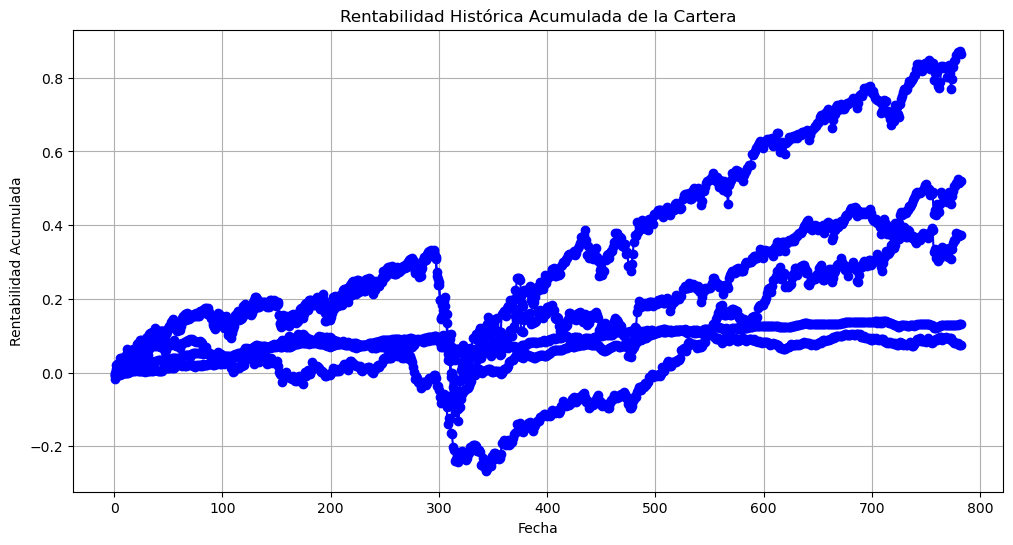

In [49]:
# 3. Graficar la rentabilidad acumulada
plt.figure(figsize=(12, 6))
plt.plot(rentabilidad_acumulada_activos, marker='o', linestyle='-', color='b')
plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.grid(True)
plt.show()

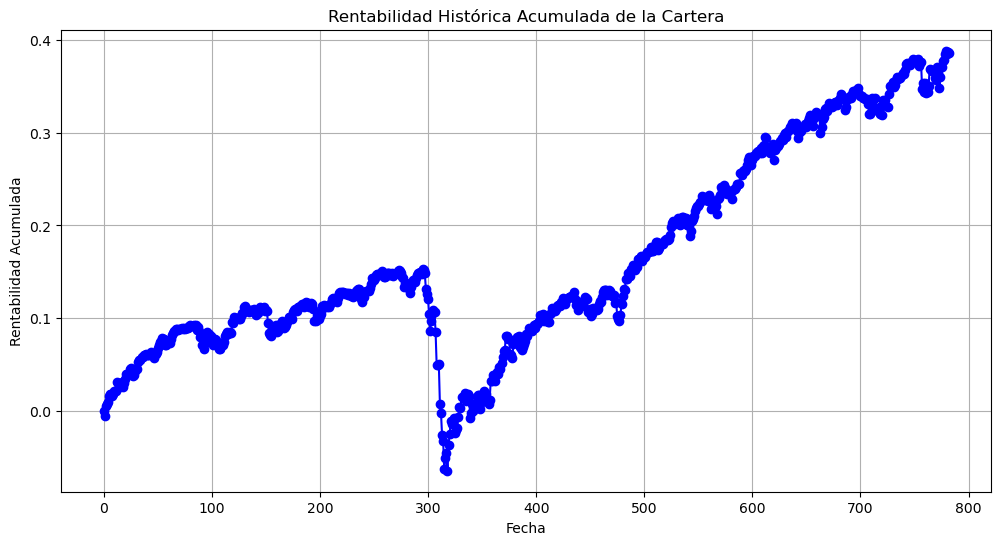

In [50]:
# 3. Graficar la rentabilidad acumulada
plt.figure(figsize=(12, 6))
plt.plot(rentabilidad_acumulada_portafolio, marker='o', linestyle='-', color='b')
plt.title('Rentabilidad Histórica Acumulada de la Cartera')
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad Acumulada')
plt.grid(True)
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [52]:
# Calcular la rentabilidad total acumulada (producto acumulado) del portafolio
rentabilidad_total = (1 + rendimiento_diario_portafolio).prod() - 1

# Calcular el número de días en el periodo (usando el índice del DataFrame)
n_dias = len(rendimiento_diario_portafolio)

# Rentabilidad anualizada usando el rendimiento total acumulado
rentabilidad_anualizada = (1 + rentabilidad_total) ** (252 / n_dias) - 1  # 252 días en un año laboral

print(f"Rentabilidad anualizada: {rentabilidad_anualizada * 100:.2f}%")

Rentabilidad anualizada: 11.07%


<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [54]:
volatilidad_diaria = rendimiento_diario_portafolio.std()
volatilidad_diaria

0.005265848075609364

In [55]:
volatilidad_anualizada = volatilidad_diaria * np.sqrt(261)
volatilidad_anualizada

0.08507237920946549

In [56]:
print(f"Volatilidad Anualizada: {volatilidad_anualizada:.2f}")

Volatilidad Anualizada: 0.09


<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [58]:
financial_assets_information = pd.read_csv("/Users/sarasalmon/Desktop/IRONHACK/Data_Analytics/Semana_4/QUEST/financial_assets_information.csv")
financial_assets_information

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative
